GIT HUB:


Ido - https://github.com/Idoamarteli20/Machine-learning-task-3


Amit - https://github.com/amitkedem195/assigment-3-machine-learning



Daniel - https://github.com/danielcohen0121/assignment-3-machine-learning

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [37]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

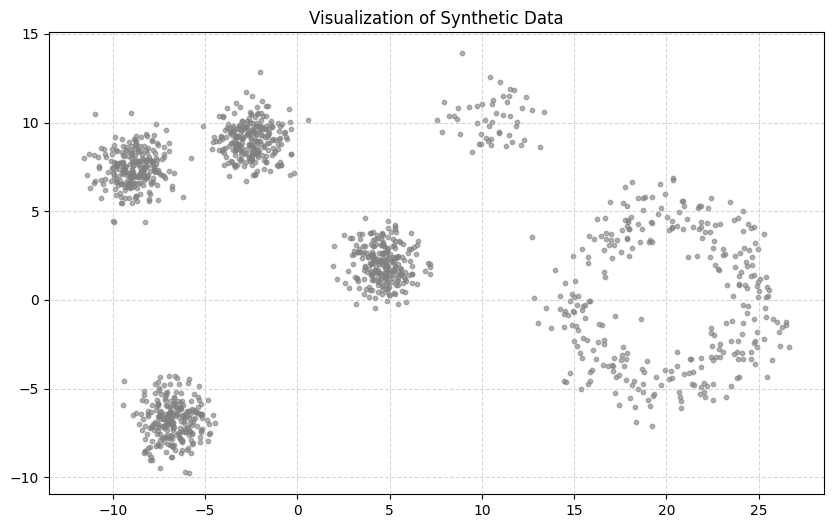

In [38]:
!pip install mlflow
X = create_data(1.0, 1000, 50, 300, 200)


plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, c='gray', alpha=0.6)
plt.title("Visualization of Synthetic Data")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import mlflow

global_mean = X.mean(axis=0)
tss = ((X - global_mean) ** 2).sum()

kmeans_results = []
best_silhouette = -1
best_k = -1
best_metrics = {}

print(f"{'--- Starting K-Means Experiments (18 Runs) ---':^60}")

for k in range(2, 20):
    with mlflow.start_run(run_name=f"KMeans_k_{k}"):

        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        model.fit(X)
        labels = model.labels_


        wcss = model.inertia_
        bcss = tss - wcss

        variance_ratio = (bcss / tss) if tss != 0 else 0
        sil_score = silhouette_score(X, labels)


        print(f"k={k:<2}: Silhouette={sil_score:.4f} | WCSS={wcss:.2f} | BCSS={bcss:.2f} | variance_ratio={variance_ratio:.4f}")


        if sil_score > best_silhouette:
            best_silhouette = sil_score
            best_k = k
            best_metrics = {
                "WCSS": wcss,
                "BCSS": bcss,
                "variance_ratio": variance_ratio
            }


        mlflow.log_param("algorithm", "K-Means")
        mlflow.log_param("n_clusters", k)
        mlflow.log_metric("WCSS", wcss)
        mlflow.log_metric("BCSS", bcss)
        mlflow.log_metric("Silhouette", sil_score)
        mlflow.log_metric("variance_ratio", variance_ratio)


        kmeans_results.append({
            "k": k,
            "Silhouette": sil_score,
            "WCSS": wcss,
            "BCSS": bcss,
            "Variance Ratio": variance_ratio
        })

print("-" * 60)
print(f" The Best k is: {best_k}")
print(f"   Stats: Silhouette={best_silhouette:.4f} | WCSS={best_metrics['WCSS']:.2f}")
print("-" * 60)


df_kmeans = pd.DataFrame(kmeans_results)

       --- Starting K-Means Experiments (18 Runs) ---       
k=2 : Silhouette=0.5673 | WCSS=83212.63 | BCSS=127843.68 | variance_ratio=0.6057
k=3 : Silhouette=0.5858 | WCSS=47215.83 | BCSS=163840.49 | variance_ratio=0.7763
k=4 : Silhouette=0.6813 | WCSS=19465.56 | BCSS=191590.75 | variance_ratio=0.9078
k=5 : Silhouette=0.6976 | WCSS=14089.74 | BCSS=196966.57 | variance_ratio=0.9332
k=6 : Silhouette=0.7251 | WCSS=9835.57 | BCSS=201220.74 | variance_ratio=0.9534
k=7 : Silhouette=0.7026 | WCSS=6635.59 | BCSS=204420.72 | variance_ratio=0.9686
k=8 : Silhouette=0.7160 | WCSS=4525.62 | BCSS=206530.69 | variance_ratio=0.9786
k=9 : Silhouette=0.7161 | WCSS=3701.13 | BCSS=207355.18 | variance_ratio=0.9825
k=10: Silhouette=0.7126 | WCSS=3250.03 | BCSS=207806.28 | variance_ratio=0.9846
k=11: Silhouette=0.7080 | WCSS=2997.55 | BCSS=208058.76 | variance_ratio=0.9858
k=12: Silhouette=0.6194 | WCSS=2832.91 | BCSS=208223.40 | variance_ratio=0.9866
k=13: Silhouette=0.5376 | WCSS=2665.31 | BCSS=208391.00

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

global_mean = X.mean(axis=0)
tss = ((X - global_mean) ** 2).sum()

agg_results = []
best_silhouette = -1
best_k = -1
best_metrics = {}

print(f"{'--- Starting Agglomerative Clustering Experiments (18 Runs) ---':^70}")


for k in range(2, 20):
    with mlflow.start_run(run_name=f"Agglomerative_k_{k}"):


        model = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels = model.fit_predict(X)


        wcss = 0
        unique_labels = np.unique(labels)
        for label in unique_labels:
            cluster_points = X[labels == label]
            center = cluster_points.mean(axis=0)
            wcss += np.sum((cluster_points - center) ** 2)

        bcss = tss - wcss
        variance_ratio = (bcss / tss) if tss != 0 else 0
        sil_score = silhouette_score(X, labels)


        print(f"k={k:<2}: Silhouette={sil_score:.4f} | WCSS={wcss:.2f} | BCSS={bcss:.2f} | variance_ratio={variance_ratio:.4f}")


        if sil_score > best_silhouette:
            best_silhouette = sil_score
            best_k = k
            best_metrics = {
                "WCSS": wcss,
                "BCSS": bcss,
                "variance_ratio": variance_ratio
            }


        mlflow.log_param("algorithm", "Agglomerative")
        mlflow.log_param("n_clusters", k)
        mlflow.log_metric("WCSS", wcss)
        mlflow.log_metric("BCSS", bcss)
        mlflow.log_metric("Silhouette", sil_score)
        mlflow.log_metric("variance_ratio", variance_ratio)


        agg_results.append({
            "Algorithm": "Agglomerative",
            "k": k,
            "Silhouette": sil_score,
            "WCSS": wcss,
            "BCSS": bcss,
            "Variance Ratio": variance_ratio
        })

print("-" * 70)
print(f" Best Agglomerative k: {best_k}")
print(f"   Stats: Silhouette={best_silhouette:.4f} | WCSS={best_metrics['WCSS']:.2f}")
print("-" * 70)


df_agg = pd.DataFrame(agg_results)

   --- Starting Agglomerative Clustering Experiments (18 Runs) ---    
k=2 : Silhouette=0.5698 | WCSS=86589.58 | BCSS=124466.73 | variance_ratio=0.5897
k=3 : Silhouette=0.5806 | WCSS=47923.96 | BCSS=163132.35 | variance_ratio=0.7729
k=4 : Silhouette=0.6813 | WCSS=19483.46 | BCSS=191572.85 | variance_ratio=0.9077
k=5 : Silhouette=0.6978 | WCSS=14107.64 | BCSS=196948.68 | variance_ratio=0.9332
k=6 : Silhouette=0.7257 | WCSS=9854.77 | BCSS=201201.54 | variance_ratio=0.9533


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


data_center = np.mean(X, axis=0)

total_inertia = np.sum((X - data_center) ** 2)

eps_range = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 1.7]
min_samples_range = [3, 5, 10, 15]

experiment_logs = []

print(f"{'=== Initiating DBSCAN Grid Search ===':^60}")


for eps in eps_range:
    for min_pts in min_samples_range:

        run_id = f"DB_E{eps}_M{min_pts}"

        with mlflow.start_run(run_name=run_id):
            db_scanner = DBSCAN(eps=eps, min_samples=min_pts)
            labels = db_scanner.fit_predict(X)

            unique_lbs = set(labels)
            has_noise = -1 in unique_lbs

            k_count = len(unique_lbs) - (1 if has_noise else 0)

            current_sil = -1.0
            current_wcss = total_inertia
            current_bcss = 0

            if k_count >= 2:
                current_sil = silhouette_score(X, labels)

                temp_wcss = 0
                for lbl in unique_lbs:
                    if lbl == -1: continue


                    cluster_data = X[labels == lbl]
                    center_point = cluster_data.mean(axis=0)

                    temp_wcss += np.sum((cluster_data - center_point) ** 2)

                current_wcss = temp_wcss
                current_bcss = total_inertia - current_wcss

                print(f"-> Params: eps={eps}, min={min_pts} | Found {k_count} clusters | Sil={current_sil:.4f}")

            mlflow.log_param("algo", "DBSCAN")
            mlflow.log_param("epsilon", eps)
            mlflow.log_param("min_pts", min_pts)

            mlflow.log_metric("k_clusters", k_count)
            mlflow.log_metric("silhouette", current_sil)
            mlflow.log_metric("wcss", current_wcss)
            mlflow.log_metric("bcss", current_bcss)

            experiment_logs.append({
                "Algorithm": "DBSCAN",
                "Parameters": f"eps={eps}, min={min_pts}",
                "Clusters": k_count,
                "Silhouette": current_sil,
                "WCSS": current_wcss,
                "BCSS": current_bcss
            })

successful_runs = [run for run in experiment_logs if run['Clusters'] >= 2]

print("=" * 60)
if successful_runs:
    best_config = max(successful_runs, key=lambda x: x['Silhouette'])

    print(f" BEST DBSCAN CONFIGURATION:")
    print(f"   Settings: {best_config['Parameters']}")
    print(f"   Stats: k={best_config['Clusters']} | Silhouette={best_config['Silhouette']:.4f}")
else:
    print(" No valid clustering structure found.")
print("=" * 60)

df_dbscan = pd.DataFrame(experiment_logs)


6. Compare the results and choose the best method for the data


In [ ]:
import numpy as np

km_sorted = sorted(kmeans_results, key=lambda x: x['Silhouette'])
km_best = km_sorted[-1]

agg_sorted = sorted(agg_results, key=lambda x: x['Silhouette'])
agg_best = agg_sorted[-1]

db_filtered = [item for item in db_results_list if item['Clusters'] > 1]
if db_filtered:
    db_best = sorted(db_filtered, key=lambda x: x['Silhouette'])[-1]
else:
    db_best = {'Parameters': 'N/A', 'Clusters': 0, 'Silhouette': -1.0, 'WCSS': 0, 'BCSS': 0}

perf_data = [
    ['K-Means', km_best['k'], km_best['Silhouette'], km_best['WCSS']],
    ['Agglomerative', agg_best['k'], agg_best['Silhouette'], agg_best['WCSS']],
    ['DBSCAN', db_best['Clusters'], db_best['Silhouette'], np.nan]
]

summary_df = pd.DataFrame(perf_data, columns=['Algorithm', 'Clusters', 'Silhouette', 'WCSS'])

champion_idx = summary_df['Silhouette'].idxmax()
champion_name = summary_df.loc[champion_idx, 'Algorithm']
champion_score = summary_df.loc[champion_idx, 'Silhouette']

print("PERFORMANCE SUMMARY TABLE")
print(summary_df.to_string(index=False))
print(f"\nOPTIMAL ALGORITHM: {champion_name}")
print(f"MAX SILHOUETTE SCORE: {champion_score:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

bar_colors = ['steelblue', 'peru', 'forestgreen']
bars1 = axes[0].bar(summary_df['Algorithm'], summary_df['Silhouette'], color=bar_colors, edgecolor='black')
axes[0].set_title('Silhouette Score Comparison')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1.05)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

for rect in bars1:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.3f}', ha='center', va='bottom')

wcss_df = summary_df[summary_df['Algorithm'] != 'DBSCAN']
bars2 = axes[1].bar(wcss_df['Algorithm'], wcss_df['WCSS'], color=['steelblue', 'peru'], edgecolor='black')
axes[1].set_title('WCSS Comparison (Centroid-based only)')
axes[1].set_ylabel('Inertia')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

for rect in bars2:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

full_data = []

for item in kmeans_results:
    item['Method'] = 'K-Means'
    full_data.append(item)

for item in agg_results:
    item['Method'] = 'Agglomerative'
    full_data.append(item)

for item in db_results_list:
    item['Method'] = 'DBSCAN'
    full_data.append(item)

export_df = pd.DataFrame(full_data)

column_order = ['Method', 'Parameters', 'k', 'Clusters', 'eps', 'min_samples', 'Silhouette', 'WCSS', 'BCSS', 'Variance Ratio']
final_cols = [c for c in column_order if c in export_df.columns]
export_df = export_df[final_cols]

filename = 'Ido_Abodi_Amarteli_ex3.xlsx'
export_df.to_excel(filename, index=False)
print(f"Data exported to {filename}")

try:
    from google.colab import files
    files.download(filename)
except ImportError:
    pass